# The canonical nonholonomic robot model
The model (also known as the unicycle model) is described by 
$$ \begin{bmatrix} \dot{\theta} \\ \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} \omega \\ v\cos\theta \\ v\sin\theta \end{bmatrix}, $$
where $v$ is the linear velocity and $\omega$ is the angular velocity, both of which are considered input signals to the model.

With certain limitations on the input signals both differential drive robots and car-like robots can be described by the above model.


## Differential drive robot

<img src="https://github.com/robotica-cem/mobile-robots-module/blob/main/figures/unicycle-model-details.png?raw=true" width="600"/>
The robot has two independent input signals, the angular velocity of each wheel, $\omega_L$ and $\omega_R$. 

Determine the relationship between the wheel angular velocities and the linear and angular velocity of the canonical model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import doctest
%matplotlib notebook

In [16]:
def diffdrive2canonical(wL, wR, r=0.1, d=0.2):
    """
    Returns the linear and angular velocity of the canonical robot model given the 
    angular velocities of each wheel.
    
    Arguments
    ---------
       wL  :  float 
              The angular velocity of the left wheel in rad/s.
       wR  :  float 
              The angular velocity of the right wheel in rad/s.
              
    Returns
    --------
       w  :  float 
             The angular velocity of the canonical model in rad/s.
       v  :  float 
             The linear velocity of the canonical model in m/s.
             
    Tests
    ------
    1) Equal but opposite angular velocities give only angular velocity.
    >>> w, v = diffdrive2canonical(1,-1)
    >>> print("v = %0.1f" % (v))
    v = 0.0
    
    2) Equal angular velocities give only linear velocity
    >>> w, v = diffdrive2canonical(1,1)
    >>> print("w = %0.1f" % (w))
    w = 0.0
    
    """
    
    w = 1
    v = 1
    return (w,v)


In [24]:
# Run doctest
doctest.run_docstring_examples(diffdrive2canonical, globals(), verbose=False)

**********************************************************************
File "__main__", line 24, in NoName
Failed example:
    print("v = %0.1f" % (v))
Expected:
    v = 0.0
Got:
    v = 1.0
**********************************************************************
File "__main__", line 29, in NoName
Failed example:
    print("w = %0.1f" % (w))
Expected:
    w = 0.0
Got:
    w = 1.0


In [21]:
def canonical2diffdrive(w, v, r=0.1, d=0.2):
    """
    Returns the angular velocities of the two wheels, respectively, of a differential
    drive robot corresponding to a certain angular and linear velocity of the canonical model.
    
    Arguments
    ---------
       w  :  float
             The angular velocity in rad/s.
       v  :  float
             The linear velocity in m/s.
             
    Returns
    -------
       wL  :  float
              The angular velocity of the left wheel in rad/s
       wR  :  float
              The angular velocity of the right wheel in rad/s
              
    Tests
    -----
    
    1) Only linear velocity gives same wheel velocities.
    >>> wL, wR = canonical2diffdrive(0, 1)
    >>> wL == wR
    True

    2) Only angular velocity gives same wheel velocities, but opposite sign.
    >>> wL, wR = canonical2diffdrive(1, 0)
    >>> wL == -wR
    True

    """
    
    wL = 1.0
    wR = 2.0
    
    return (wL, wR)

In [23]:
# Run doctest
doctest.run_docstring_examples(canonical2diffdrive, globals(), verbose=False)

**********************************************************************
File "__main__", line 25, in NoName
Failed example:
    wL == wR
Expected:
    True
Got:
    False
**********************************************************************
File "__main__", line 30, in NoName
Failed example:
    wL == -wR
Expected:
    True
Got:
    False


### Limits on the possibe inputs
Plot the possible range of inputs to the canonical model given limits on the wheel velocities.


<IPython.core.display.Javascript object>


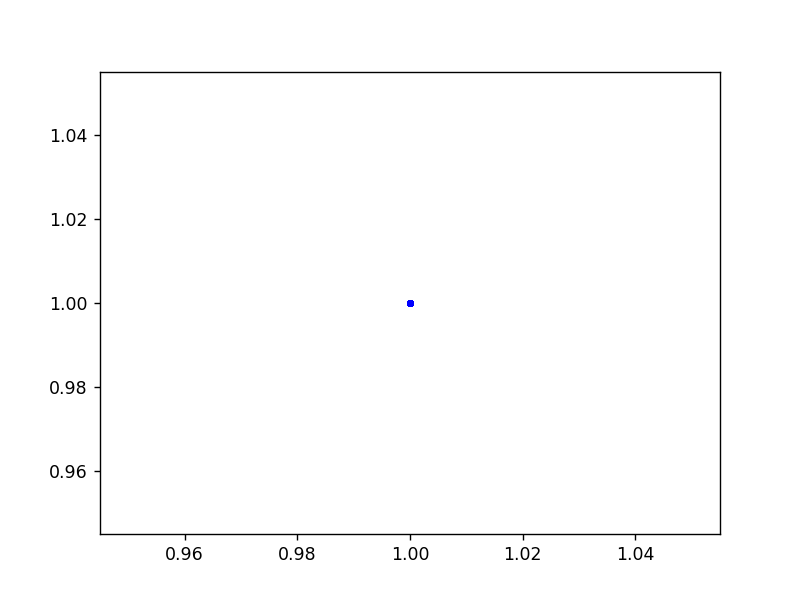

In [27]:
# Plotting the possible range of inputs to the canonical model given limits on the wheel
# velocities
wmax = 10 # Just picking something
N = 20
wv = [ diffdrive2canonical(wL, wR) for wL in np.linspace(-wmax, wmax, 20) \
      for wR in np.linspace(-wmax, wmax, 20)]
wv = np.array(wv)
plt.figure()
plt.plot(wv[:,1], wv[:,0], 'b.')

## Car-like robot
Car-like robots with steering of the front axle can be simplified to the bicycle model.
<img src="https://www.researchgate.net/profile/Ahmad-Albalasie-2/publication/308360105/figure/fig3/AS:654104066019330@1532961970349/Car-like-robot-gray-wheels-are-the-bicycle-model-Bon-12-p-38-In-the-case-of-the.png" width="800"/> (Image by Ahmad Albalasie, Resarchgate)

Taking the mid-point of the rear axle as the reference point of the car simplifies the kinematics. The robot will have an instantanous center of rotation (ICR) at a certain distance $R$ from the reference point. The ICR depends on the steering angle $\phi$ and the wheel-base $L$ according to the geometry shown in the figure above. With linear velocity of the reference point $v$, the angular velocity of the robot is given by $\omega = \frac{v}{R} = \gamma v$, where $\gamma = \frac{1}{R}$ is called the curvature.  

The car-like robot has as its inputs the linear velocity $v$ of the rear axle, and the steering angle $\phi$. Determine the relationship between these inputs and the linear- and angular velocities of the canonical robot model. 

In [36]:
def car2canonical(vv, phi, L=0.5):
    """
    Returns the linear and angular velocity of the canonical robot model given the 
    linear velocity and steering angle of the car-like robot (bicycle model). 
    
    Arguments
    ---------
       vv   :  float 
              The linear velocity of the midpoint of the rear axle in m/s.
       phi :  float 
              The steering angle in radians.
              
    Returns
    --------
       w  :  float 
             The angular velocity of the canonical model in rad/s.
       v  :  float 
             The linear velocity of the canonical model in m/s.
             
    Tests
    ------
    1) The linear velocity of the reference point of the car is the same as the
    linear velocity of the canonical model.
    >>> w, v = car2canonical(1.0, 0.0)
    >>> print("v = %0.1f" % (v))
    v = 1.0
    
    2) A steering angle of 45 degrees will give a transversal velocity of the 
    front wheel which is equal to the linear forward velocity of the rear wheel,
    so the angular velocity will be given by v/L.
    >>> vv = 1.0
    >>> L = 0.5
    >>> w, v = car2canonical(vv, np.pi/4, L=L)
    >>> abs( vv/L - w ) < 1e-10
    True
    
    """
    
    v = vv
    w = 0.0
    return (w,v)


In [37]:
# Run doctest
doctest.run_docstring_examples(car2canonical, globals(), verbose=False)

In [38]:
def canonical2car(w, v, L=0.5):
    """
    Returns the angular velocities of the two wheels, respectively, of a differential
    drive robot corresponding to a certain angular and linear velocity of the canonical model.
    
    Arguments
    ---------
       w  :  float
             The angular velocity in rad/s.
       v  :  float
             The linear velocity in m/s.
       L  :  float
             The wheel-base in m.
             
    Returns
    -------
       vv  :  float
              The linear velocity of the midpoint of the rear axle
       phi :  float
              The steering angle
              
    Tests
    -----
    
    1) Only linear velocity gives zero steering angle.
    >>> vv, phi = canonical2car(0,1)
    >>> phi == 0
    True

    2) Angular velocity equal to vv/L should correspond to steering angle of 45 degrees.
    >>> v = 1.0
    >>> L = 0.8
    >>> w = v/L
    >>> vv, phi = canonical2car(w, v, L=L)
    >>> abs(phi - np.pi/4) < 1e-10
    True

    """
    
    vv = 1.0
    phi = 1.0
    
    return (vv, phi)

In [ ]:
# Run doctest
doctest.run_docstring_examples(canonical2car, globals(), verbose=False)